In [ ]:
# 炎 Esteban Quintero Sotomayor - 20110388. 炎

In [1]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 14.9 MB/s eta 0:00:00


In [2]:
# Import many libraries to work with PDF files, apply regular
# expressions and make plots
import PyPDF2
import re

import matplotlib.pyplot as plt


Paginas donde se encontró Enfermedades del corazón (original) -> [9, 22, 30, 31, 32, 33, 34, 35, 36, 37]

Cantidad de veces que se encontró Enfermedades del corazón (original) -> [3, 1, 13, 13, 13, 13, 13, 13, 13, 13]



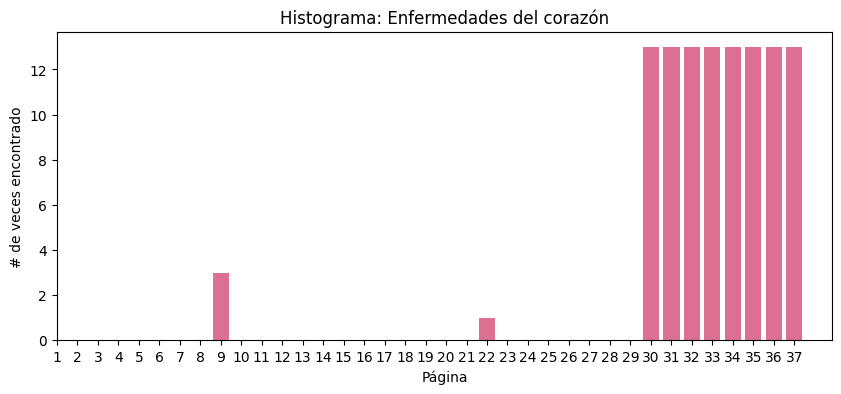


Localidad donde se encontró Enfermedades del corazón (original) en esas páginas -> [[225, 252, 279], [90], [239, 267, 295, 723, 751, 779, 1228, 1256, 1284, 1716, 1744, 1772, 2319], [244, 272, 300, 752, 807, 888, 1253, 1281, 1309, 1813, 1841, 1869, 2448], [241, 269, 297, 772, 800, 828, 1256, 1284, 1312, 1782, 1810, 1838, 2417], [232, 260, 288, 752, 780, 808, 1264, 1292, 1320, 1810, 1838, 1866, 2456], [231, 259, 287, 740, 768, 796, 1219, 1247, 1275, 1737, 1765, 1793, 2398], [231, 259, 287, 797, 825, 853, 1307, 1335, 1363, 1824, 1852, 1880, 2429], [232, 260, 288, 716, 744, 772, 1219, 1247, 1275, 1742, 1770, 1798, 2347], [233, 261, 289, 780, 808, 836, 1329, 1357, 1385, 1838, 1866, 1894, 2451]]



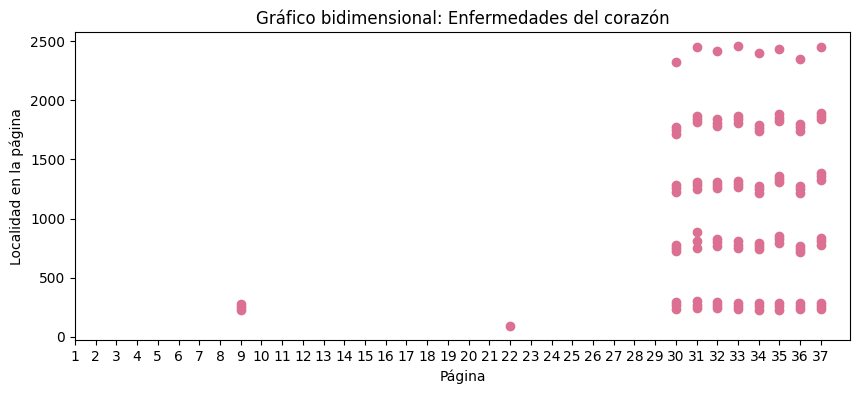




Paginas donde se encontró enfermedades del corazón (minúsculas) -> [9, 10]

Cantidad de veces que se encontró enfermedades del corazón (minúsculas) -> [1, 1]



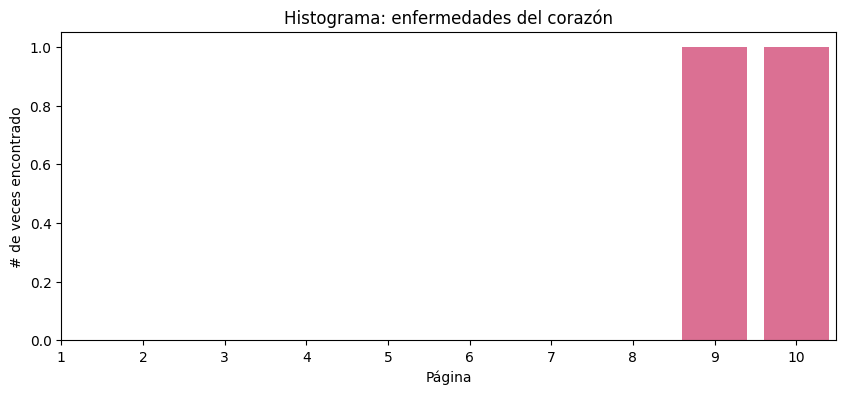


Localidad donde se encontró enfermedades del corazón (minúsculas) en esas páginas -> [[2562], [863]]



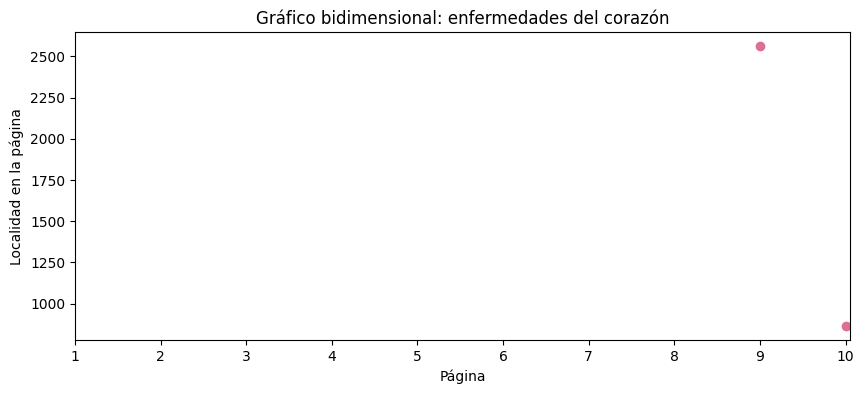



No se encontraron ocurrencias para ENFERMEDADES DEL CORAZÓN (mayúsculas)



Paginas donde se encontró Diabetes mellitus (original) -> [9, 22, 30, 31, 32, 33, 34, 35, 36, 37, 9, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

Cantidad de veces que se encontró Diabetes mellitus (original) -> [3, 1, 13, 13, 13, 13, 13, 13, 13, 13, 4, 8, 8, 7, 13, 13, 13, 13, 13, 13, 13, 12]



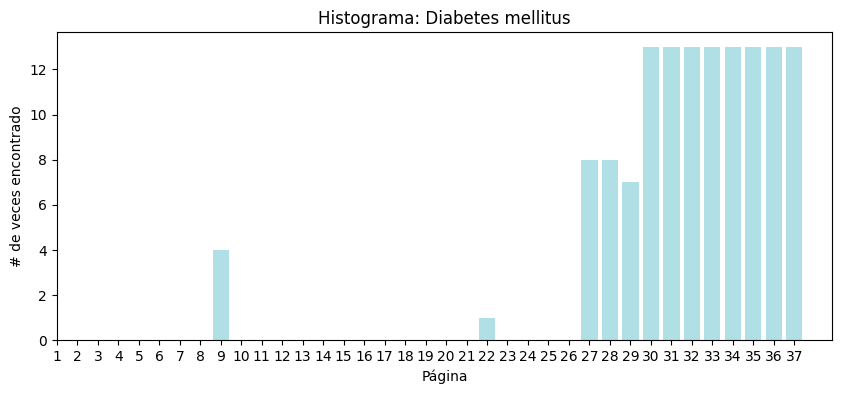


Localidad donde se encontró Diabetes mellitus (original) en esas páginas -> [[225, 252, 279], [90], [239, 267, 295, 723, 751, 779, 1228, 1256, 1284, 1716, 1744, 1772, 2319], [244, 272, 300, 752, 807, 888, 1253, 1281, 1309, 1813, 1841, 1869, 2448], [241, 269, 297, 772, 800, 828, 1256, 1284, 1312, 1782, 1810, 1838, 2417], [232, 260, 288, 752, 780, 808, 1264, 1292, 1320, 1810, 1838, 1866, 2456], [231, 259, 287, 740, 768, 796, 1219, 1247, 1275, 1737, 1765, 1793, 2398], [231, 259, 287, 797, 825, 853, 1307, 1335, 1363, 1824, 1852, 1880, 2429], [232, 260, 288, 716, 744, 772, 1219, 1247, 1275, 1742, 1770, 1798, 2347], [233, 261, 289, 780, 808, 836, 1329, 1357, 1385, 1838, 1866, 1894, 2451], [413, 433, 453, 2799], [465, 798, 844, 863, 2323, 3793, 3812, 4291], [435, 753, 772, 809, 828, 2141, 3287, 4059], [787, 806, 825, 844, 1944, 3795, 4238], [373, 420, 441, 837, 858, 959, 1486, 1506, 1526, 1826, 1847, 1868, 2347], [360, 381, 402, 916, 963, 984, 1369, 1390, 1411, 1929, 2030, 2051, 2476], [357,

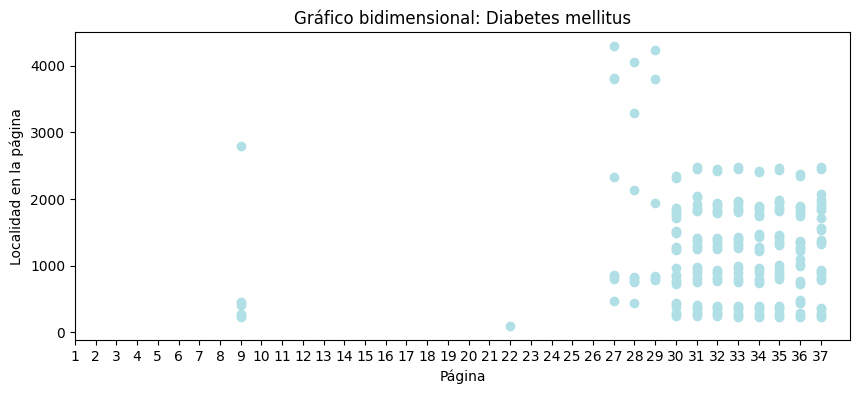




Paginas donde se encontró diabetes mellitus (minúsculas) -> [9, 10, 1, 11]

Cantidad de veces que se encontró diabetes mellitus (minúsculas) -> [1, 1, 1, 4]



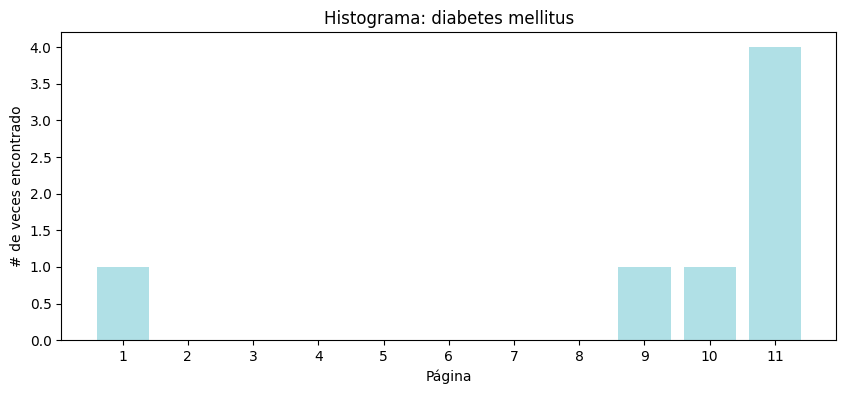


Localidad donde se encontró diabetes mellitus (minúsculas) en esas páginas -> [[2562], [863], [381], [114, 190, 937, 991]]



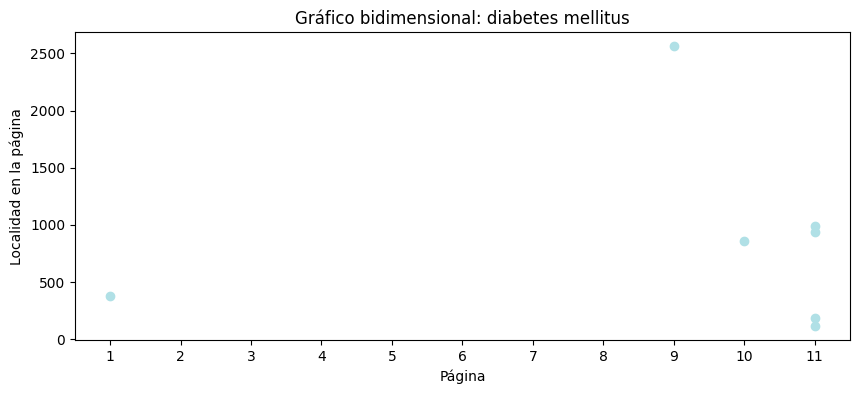




Paginas donde se encontró DIABETES MELLITUS (mayúsculas) -> [11]

Cantidad de veces que se encontró DIABETES MELLITUS (mayúsculas) -> [2]



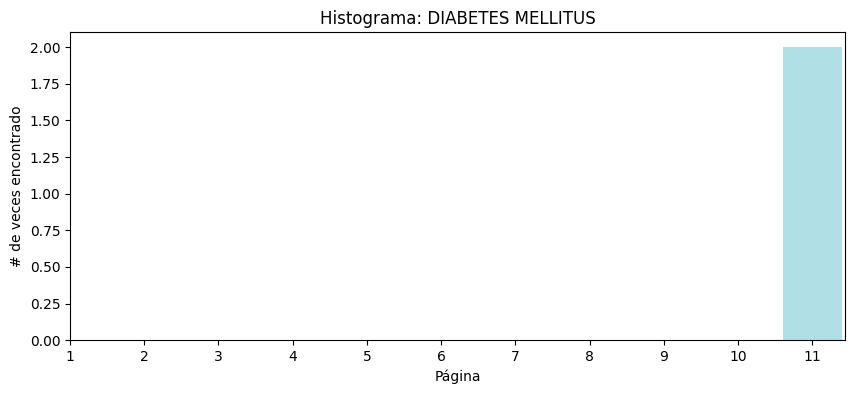


Localidad donde se encontró DIABETES MELLITUS (mayúsculas) en esas páginas -> [[330, 1399]]



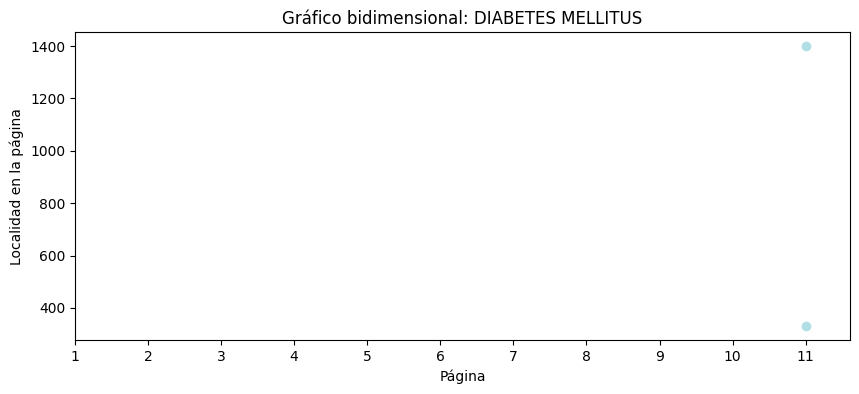

In [ ]:
# The file is assigned to pdf_path
pdf_path = 'DR_EneJun2022.pdf'

# The words to be searched are stored in search_queary
search_query = ['Enfermedades del corazón', 'Diabetes mellitus']

# Each word to be searched has its own plot color
plotColor = ['palevioletred', 'powderblue']

# Arrays to store all the occurrences, its location, amount and page
# for three variants: original, lower and upper case
originalOccurrencesLocation = []
originalOccurrencesNumber = []
originalOccurrencesPage = []
lowerOccurrencesLocation = []
lowerOccurrencesNumber = []
lowerOccurrencesPage = []
upperOccurrencesLocation = []
upperOccurrencesNumber = []
upperOccurrencesPage = []

def search_text_in_pdf(pdf_path, search_query, caps):
    # Open the PDF file in read-binary mode
    with open(pdf_path, 'rb') as file:

        i = 0

        # Create a PDF reader object
        reader = PyPDF2.PdfReader(file)

        # Iterate through each page in the PDF
        for page_number in range(1, len(reader.pages) + 1):

            # Get the current page
            page = reader.pages[page_number - 1]

            # Extract the text from the page
            text = page.extract_text()

            # Remove bold formatting
            text = re.sub(r'<b>|</b>', '', text)

            # Define patterns to match common heading formats
            heading_patterns = [
                (r'<h1>(.*?)</h1>', r'\1'),  # Match <h1>heading</h1> and replace with heading
                (r'<h2>(.*?)</h2>', r'\1'),  # Match <h2>heading</h2> and replace with heading
            ]

            # Convert headings to plain text
            for pattern, replacement in heading_patterns:
                text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

            # Print the modified text
            # print(f"Page {page}: {text}")

            # Search for the query in the extracted text
            if search_query in text:

                # Every time there is an new ocurrence, local arrays are cleared
                oOccurrences = [0 for x in range(10000)]
                lOccurrences = [0 for x in range(10000)]
                uOccurrences = [0 for x in range(10000)]

                # Find the locations of the query in the text
                start_index = 0

                while True:
                    # Find the next occurrence of the query
                    index = text.find(search_query, start_index)

                    # No more occurrences found
                    if index == -1:
                        # For all three caps type, global arrays are called
                        # depending the current caps value, then, zeros are
                        # removed from local arrays so that they are
                        # immediately stored in the global arrays thanks to
                        # append method
                        if caps == -1:
                            global originalOccurrencesLocation, originalOccurrencesPage

                            oOccurrences = [x for x in oOccurrences if x != 0]
                            originalOccurrencesLocation.append(oOccurrences)
                            originalOccurrencesNumber.append(len(oOccurrences))
                            oOccurrences = [0 for x in range(10000)]

                            originalOccurrencesPage.append(page_number)

                        elif caps == 0:
                            global lowerOccurrencesLocation, lowerOccurrencesPage

                            lOccurrences = [x for x in lOccurrences if x != 0]
                            lowerOccurrencesLocation.append(lOccurrences)
                            lowerOccurrencesNumber.append(len(lOccurrences))
                            lOccurrences = [0 for x in range(10000)]

                            lowerOccurrencesPage.append(page_number)

                        elif caps == 1:
                            global upperOccurrencesLocation, upperOccurrencesPage

                            uOccurrences = [x for x in uOccurrences if x != 0]
                            upperOccurrencesLocation.append(uOccurrences)
                            upperOccurrencesNumber.append(len(uOccurrences))
                            uOccurrences = [0 for x in range(10000)]

                            upperOccurrencesPage.append(page_number)

                        break

                    # Add the location of the occurrence to the according list
                    if caps == -1:
                        oOccurrences[i] = index
                    elif caps == 0:
                        lOccurrences[i] = index
                    elif caps == 1:
                        uOccurrences[i] = index

                    i = i + 1

                    # Update the start index for the next iteration
                    start_index = index + 1

def plotData(generalOcurrencesPage, generalOcurrencesNumber, generalOcurrencesLocation, generalOcurrencesIndex, generalOcurrencesTypeCaps):
    # If the length is zero, then the current ocurrence has not found the requested word
    if len(generalOcurrencesPage) > 0:
        print(f"\nPaginas donde se encontró {search_query[generalOcurrencesIndex]} ({generalOcurrencesTypeCaps}) -> {generalOcurrencesPage}")

        print(f"\nCantidad de veces que se encontró {search_query[generalOcurrencesIndex]} ({generalOcurrencesTypeCaps}) -> {generalOcurrencesNumber}\n")

        # Plotting the original occurrences histogram
        plt.figure(figsize=(10, 4))  # Width: 10 inches, Height: 4 inches
        plt.bar(generalOcurrencesPage, generalOcurrencesNumber, color=plotColor[generalOcurrencesIndex])
        plt.xticks(range(1, max(generalOcurrencesPage)+1))
        plt.xlabel('Página')
        plt.ylabel('# de veces encontrado')
        plt.title('Histograma: ' + search_query[generalOcurrencesIndex])
        plt.show()

        print(f"\nLocalidad donde se encontró {search_query[generalOcurrencesIndex]} ({generalOcurrencesTypeCaps}) en esas páginas -> {generalOcurrencesLocation}\n")

        # Flatten the locations array to plot it in a scatter graphic
        x = []
        y = []

        for k, page in enumerate(generalOcurrencesPage):
            x.extend([page] * len(generalOcurrencesLocation[k]))
            y.extend(generalOcurrencesLocation[k])

        plt.figure(figsize=(10, 4))  # Width: 10 inches, Height: 4 inches
        # Plotting the scatter plot
        # A scatter plot displays individual data points as markers on a two-dimensional plane,
        # where each point represents the values of two variables. It is useful for visualizing relationships or patterns between variables.
        plt.scatter(x, y, color=plotColor[generalOcurrencesIndex])
        plt.xticks(range(1, max(generalOcurrencesPage)+1))
        plt.xlabel('Página')
        plt.ylabel('Localidad en la página')
        plt.title('Gráfico bidimensional: ' + search_query[generalOcurrencesIndex])
        plt.show()

        print("\n")
    else:
        print(f"No se encontraron ocurrencias para {search_query[generalOcurrencesIndex]} ({generalOcurrencesTypeCaps})\n\n")

for j in range(len(search_query)):
    # Firstable, the requested word stored in search_query array in the current
    # index is searched in its original state which is = -1
    caps = -1
    search_text_in_pdf(pdf_path, search_query[j], caps)

    # To plot all its occurrences in an histogram and a scatter graphic
    typeCaps = "original"
    generalOcurrencesPage = originalOccurrencesPage
    generalOcurrencesNumber = originalOccurrencesNumber
    generalOcurrencesLocation = originalOccurrencesLocation
    plotData(generalOcurrencesPage, generalOcurrencesNumber, generalOcurrencesLocation, j, typeCaps)

    # Secondly, the requested word stored in search_query array in the current
    # index is searched in its lower case state which is = 0
    caps = 0
    search_query[j] = search_query[j].lower()
    search_text_in_pdf(pdf_path, search_query[j], caps)

    # To plot all its occurrences in an histogram and a scatter graphic
    typeCaps = "minúsculas"
    generalOcurrencesPage = lowerOccurrencesPage
    generalOcurrencesNumber = lowerOccurrencesNumber
    generalOcurrencesLocation = lowerOccurrencesLocation
    plotData(generalOcurrencesPage, generalOcurrencesNumber, generalOcurrencesLocation, j, typeCaps)

    # At last, the requested word stored in search_query array in the current
    # index is searched in its upper case state which is = 1
    caps = 1
    search_query[j] = search_query[j].upper()
    search_text_in_pdf(pdf_path, search_query[j], caps)

    # To plot all its occurrences in an histogram and a scatter graphic
    typeCaps = "mayúsculas"
    generalOcurrencesPage = upperOccurrencesPage
    generalOcurrencesNumber = upperOccurrencesNumber
    generalOcurrencesLocation = upperOccurrencesLocation
    plotData(generalOcurrencesPage, generalOcurrencesNumber, generalOcurrencesLocation, j, typeCaps)